# Passo 1

In [230]:
import pandas as pd
import numpy as np
from sklearn import datasets
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
#from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
#import statsmodels.api as sm
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
import sklearn.metrics as metrics
%matplotlib inline

In [231]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [232]:
import os
os.chdir("C:\\Users\\dalto\\Desktop\\Estágio\\Data Science")

dol = pd.read_csv("dados_investpy.csv", sep = ",")
#dol = pd.read_excel("PredDolarInv4.xlsx")
dol["Date"] = pd.to_datetime(dol["Date"]).dt.normalize()
dol = dol.set_index("Date")
dol

,Abertura,Máxima,Mínima,Fechamento,BollingerSup,BollingerInf,BR1Y,BR3Y,BR10Y,US3M,US5Y,US10Y,BRENT,OURO,DXY,MXN,TRY,GBAD
Date,,,,,,,,,,,,,,,,,,
2007-05-16,1985.0,1985.5,1954.0,1956.0,2062.50,1985.05,10.912,10.470,10.119,4.7240,4.6310,4.716,68.01,660.2,82.16,10.7782,1.3255,2.3986
2007-05-17,1954.5,1969.5,1953.5,1954.5,2068.42,1971.08,10.904,10.200,9.927,4.7230,4.6820,4.760,70.27,656.2,82.32,10.8142,1.3260,2.3969
2007-05-18,1955.0,1972.0,1955.0,1963.0,2070.48,1962.12,10.915,10.250,9.968,4.7680,4.7320,4.806,69.42,661.0,82.20,10.8000,1.3262,2.4001
2007-05-21,1956.0,1961.0,1940.0,1940.5,2074.92,1948.83,10.899,10.250,9.868,4.8040,4.7160,4.788,70.49,662.9,82.36,10.7665,1.3222,2.3996
2007-05-22,1942.0,1948.0,1934.5,1945.5,2075.32,1939.18,10.895,10.200,9.794,4.8670,4.7650,4.832,69.52,659.1,82.39,10.7960,1.3290,2.4103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-19,5269.0,5358.0,5261.5,5297.0,5369.31,5133.79,8.715,9.462,11.135,0.0406,0.8616,1.363,75.34,1751.4,93.19,19.9820,8.2910,1.8684
2021-09-20,5329.0,5387.0,5316.5,5338.0,5358.32,5140.28,8.595,10.020,11.075,0.0300,0.8260,1.312,73.92,1763.8,93.28,19.9820,8.2910,1.8684
2021-09-21,5320.0,5346.5,5271.5,5280.0,5337.41,5161.73,8.535,9.810,10.815,0.0250,0.8341,1.328,74.36,1778.2,93.22,19.9820,8.2910,1.8684


In [233]:
dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , "Alta", "Baixa")

In [234]:
dol.tail(20)

,Abertura,Máxima,Mínima,Fechamento,BollingerSup,BollingerInf,BR1Y,BR3Y,BR10Y,US3M,US5Y,US10Y,BRENT,OURO,DXY,MXN,TRY,GBAD,Alvo
Date,,,,,,,,,,,,,,,,,,,
2021-09-02,5190.5,5219.5,5161.5,5205.0,5413.04,5123.46,8.160,9.595,10.755,0.0460,0.7692,1.285,73.03,1811.50,92.22,19.982,8.291,1.8684,Alta
2021-09-03,5190.5,5220.0,5150.0,5216.0,5412.99,5120.31,8.160,9.595,10.755,0.0460,0.7853,1.326,72.61,1833.70,92.04,19.982,8.291,1.8684,Baixa
2021-09-05,5190.5,5220.0,5150.0,5216.0,5412.99,5120.31,8.160,9.595,10.755,0.0460,0.7853,1.326,72.61,1830.05,92.04,19.982,8.291,1.8684,Baixa
2021-09-06,5205.0,5230.0,5173.0,5187.0,5413.82,5113.23,8.240,9.660,10.880,0.0456,0.7901,1.336,72.22,1825.65,92.04,19.982,8.291,1.8684,Baixa
2021-09-07,5205.0,5230.0,5173.0,5187.0,5413.82,5113.23,8.240,9.660,10.880,0.0410,0.8238,1.377,71.69,1798.50,92.51,19.982,8.291,1.8684,Alta
2021-09-08,5216.0,5352.0,5212.5,5334.0,5420.74,5119.21,8.330,9.820,11.120,0.0460,0.8062,1.336,72.60,1793.50,92.65,19.982,8.291,1.8684,Baixa
2021-09-09,5321.0,5351.0,5210.5,5229.0,5420.65,5117.85,8.330,10.030,11.175,0.0460,0.7885,1.297,71.45,1800.00,92.48,19.982,8.291,1.8684,Alta
2021-09-10,5184.0,5287.5,5184.0,5268.0,5420.79,5118.01,8.805,10.085,11.110,0.0480,0.8160,1.343,72.92,1792.10,92.58,19.982,8.291,1.8684,Baixa
2021-09-12,5184.0,5287.5,5184.0,5268.0,5420.79,5118.01,8.805,10.085,11.110,0.0456,0.8176,1.341,72.92,1792.10,92.58,19.982,8.291,1.8684,Baixa


In [235]:
#dol = dol.replace(0, np.NaN)
#dol = dol.fillna(method = "ffill")
dol.isna().sum().sum()

0

In [236]:
dol["BR1Z5"]  = (dol["BR1Y"].rolling(5).std())
dol["BR1Z20"] = (dol["BR1Y"].rolling(20).std())
dol["BR1Z50"] = (dol["BR1Y"].rolling(50).std())

dol["BR3YZ5"]  = (dol["BR3Y"].rolling(5).std())
dol["BR3YZ20"] = (dol["BR3Y"].rolling(20).std())
dol["BR3YZ50"] = (dol["BR3Y"].rolling(50).std())

dol["BR10Z5"]  = (dol["BR10Y"].rolling(5).std())
dol["BR10Z20"] = (dol["BR10Y"].rolling(20).std())
dol["BR10Z50"] = (dol["BR10Y"].rolling(50).std())

dol["US3MZ5"]  = (dol["US3M"].rolling(5).std())
dol["US3MZ20"] = (dol["US3M"].rolling(20).std())
dol["US3MZ50"] = (dol["US3M"].rolling(50).std())

dol["US5YZ5"]  = (dol["US5Y"].rolling(5).std())
dol["US5YZ20"] = (dol["US5Y"].rolling(20).std())
dol["US5YZ50"] = (dol["US5Y"].rolling(50).std())

dol["US10YZ5"]  = (dol["US10Y"].rolling(5).std())
dol["US10YZ20"] = (dol["US10Y"].rolling(20).std())
dol["US10YZ50"] = (dol["US10Y"].rolling(50).std())

dol["OUROZ5"]  = (dol["OURO"].rolling(5).std())
dol["OUROZ20"] = (dol["OURO"].rolling(20).std())
dol["OUROZ50"] = (dol["OURO"].rolling(50).std())

dol["DXYZ5"]  = (dol["DXY"].rolling(5).std())
dol["DXYZ20"] = (dol["DXY"].rolling(20).std())
dol["DXYZ50"] = (dol["DXY"].rolling(50).std())

dol["BRENTZ5"]  = (dol["BRENT"].rolling(5).std())
dol["BRENTZ20"] = (dol["BRENT"].rolling(20).std())
dol["BRENTZ50"] = (dol["BRENT"].rolling(50).std())

dol["MXNZ5"]  = (dol["MXN"].rolling(5).std())
dol["MXNZ20"] = (dol["MXN"].rolling(20).std())
dol["MXNZ50"] = (dol["MXN"].rolling(50).std())

dol["TRYZ5"]  = (dol["TRY"].rolling(5).std())
dol["TRYZ20"] = (dol["TRY"].rolling(20).std())
dol["TRYZ50"] = (dol["TRY"].rolling(50).std())
dol = dol.replace(0, np.NaN)
dol = dol.fillna(method = "ffill")
dol.isna().sum().sum()

792

In [237]:
dol["BR1Y-3"] = dol["BR1Y"].pct_change(3)
dol["BR1Y-5"] = dol["BR1Y"].pct_change(5)
dol["BR1Y-20"] = dol["BR1Y"].pct_change(20)
dol["BR1Y-50"] = dol["BR1Y"].pct_change(50)
dol["BR1Z5"] = (dol["BR1Y"]-(dol["BR1Y"].rolling(5).mean()))/dol["BR1Z5"]
dol["BR1Z20"] = (dol["BR1Y"]-(dol["BR1Y"].rolling(20).mean()))/dol["BR1Z20"]
dol["BR1Z50"] = (dol["BR1Y"]-(dol["BR1Y"].rolling(50).mean()))/dol["BR1Z50"]
dol["BR1Y"] = dol["BR1Y"].pct_change(1)

dol["BR3Y-3"] = dol["BR3Y"].pct_change(3)
dol["BR3Y-5"] = dol["BR3Y"].pct_change(5)
dol["BR3Y-20"] = dol["BR3Y"].pct_change(20)
dol["BR3Y-50"] = dol["BR3Y"].pct_change(50)
dol["BR3YZ5"] = (dol["BR3Y"]-(dol["BR3Y"].rolling(5).mean()))/dol["BR3YZ5"]
dol["BR3YZ20"] = (dol["BR3Y"]-(dol["BR3Y"].rolling(20).mean()))/dol["BR3YZ20"]
dol["BR3YZ50"] = (dol["BR3Y"]-(dol["BR3Y"].rolling(50).mean()))/dol["BR3YZ50"]
dol["BR3Y"] = dol["BR3Y"].pct_change(1)

dol["BR10Y-3"] = dol["BR10Y"].pct_change(3)
dol["BR10Y-5"] = dol["BR10Y"].pct_change(5)
dol["BR10Y-20"] = dol["BR10Y"].pct_change(20)
dol["BR10Y-50"] = dol["BR10Y"].pct_change(50)
dol["BR10Z5"] = (dol["BR10Y"]-(dol["BR10Y"].rolling(5).mean()))/dol["BR10Z5"]
dol["BR10Z20"] = (dol["BR10Y"]-(dol["BR10Y"].rolling(20).mean()))/dol["BR10Z20"]
dol["BR10Z50"] = (dol["BR10Y"]-(dol["BR10Y"].rolling(50).mean()))/dol["BR10Z50"]
dol["BR10Y"] = dol["BR10Y"].pct_change(1)

dol["US3M-3"] = dol["US3M"].pct_change(3)
dol["US3M-5"] = dol["US3M"].pct_change(5)
dol["US3M-20"] = dol["US3M"].pct_change(20)
dol["US3M-50"] = dol["US3M"].pct_change(50)
dol["US3MZ5"] = (dol["US3M"]-(dol["US3M"].rolling(5).mean()))/dol["US3MZ5"]
dol["US3MZ20"] = (dol["US3M"]-(dol["US3M"].rolling(20).mean()))/dol["US3MZ20"]
dol["US3MZ50"] = (dol["US3M"]-(dol["US3M"].rolling(50).mean()))/dol["US3MZ50"]
dol["US3M"] = dol["US3M"].pct_change(1)

dol["US5Y-3"] = dol["US5Y"].pct_change(3)
dol["US5Y-5"] = dol["US5Y"].pct_change(5)
dol["US5Y-20"] = dol["US5Y"].pct_change(20)
dol["US5Y-50"] = dol["US5Y"].pct_change(50)
dol["US5YZ5"] = (dol["US5Y"]-(dol["US5Y"].rolling(5).mean()))/dol["US5YZ5"]
dol["US5YZ20"] = (dol["US5Y"]-(dol["US5Y"].rolling(20).mean()))/dol["US5YZ20"]
dol["US5YZ50"] = (dol["US5Y"]-(dol["US5Y"].rolling(50).mean()))/dol["US5YZ50"]
dol["US5Y"] = dol["US5Y"].pct_change(1)

dol["US10Y-3"] = dol["US10Y"].pct_change(3)
dol["US10Y-5"] = dol["US10Y"].pct_change(5)
dol["US10Y-20"] = dol["US10Y"].pct_change(20)
dol["US10Y-50"] = dol["US10Y"].pct_change(50)
dol["US10YZ5"] = (dol["US10Y"]-(dol["US10Y"].rolling(5).mean()))/dol["US10YZ5"]
dol["US10YZ20"] = (dol["US10Y"]-(dol["US10Y"].rolling(20).mean()))/dol["US10YZ20"]
dol["US10YZ50"] = (dol["US10Y"]-(dol["US10Y"].rolling(50).mean()))/dol["US10YZ50"]
dol["US10Y"] = dol["US10Y"].pct_change(1)


dol["OURO-3"] = dol["OURO"].pct_change(3)
dol["OURO-5"] = dol["OURO"].pct_change(5)
dol["OURO-20"] = dol["OURO"].pct_change(20)
dol["OURO-50"] = dol["OURO"].pct_change(50)
dol["OUROZ5"] = (dol["OURO"]-(dol["OURO"].rolling(5).mean()))/dol["OUROZ5"]
dol["OUROZ20"] = (dol["OURO"]-(dol["OURO"].rolling(20).mean()))/dol["OUROZ20"]
dol["OUROZ50"] = (dol["OURO"]-(dol["OURO"].rolling(50).mean()))/dol["OUROZ50"]
dol["OURO"] = dol["OURO"].pct_change(1)

dol["DXY-3"] = dol["DXY"].pct_change(3)
dol["DXY-5"] = dol["DXY"].pct_change(5)
dol["DXY-20"] = dol["DXY"].pct_change(20)
dol["DXY-50"] = dol["DXY"].pct_change(50)
dol["DXYZ5"] = (dol["DXY"]-(dol["DXY"].rolling(5).mean()))/dol["DXYZ5"]
dol["DXYZ20"] = (dol["DXY"]-(dol["DXY"].rolling(20).mean()))/dol["DXYZ20"]
dol["DXYZ50"] = (dol["DXY"]-(dol["DXY"].rolling(50).mean()))/dol["DXYZ50"]
dol["DXY"] = dol["DXY"].pct_change(1)

dol["BRENT-3"] = dol["BRENT"].pct_change(3)
dol["BRENT5"] = dol["BRENT"].pct_change(5)
dol["BRENT-20"] = dol["BRENT"].pct_change(20)
dol["BRENT-50"] = dol["BRENT"].pct_change(50)
dol["BRENTZ5"] = (dol["BRENT"]-(dol["BRENT"].rolling(5).mean()))/dol["BRENTZ5"]
dol["BRENTZ20"] = (dol["BRENT"]-(dol["BRENT"].rolling(20).mean()))/dol["BRENTZ20"]
dol["BRENTZ50"] = (dol["BRENT"]-(dol["BRENT"].rolling(50).mean()))/dol["BRENTZ50"] 
dol["BRENT"] = dol["BRENT"].pct_change(1)

dol["MXN-3"] = dol["MXN"].pct_change(3)
dol["MXN-5"] = dol["MXN"].pct_change(5)
dol["MXN-20"] = dol["MXN"].pct_change(20)
dol["MXN-50"] = dol["MXN"].pct_change(50)
dol["MXNZ5"] = (dol["MXN"]-(dol["MXN"].rolling(5).mean()))/dol["MXNZ5"] 
dol["MXNZ20"] = (dol["MXN"]-(dol["MXN"].rolling(20).mean()))/dol["MXNZ20"]
dol["MXNZ50"] = (dol["MXN"]-(dol["MXN"].rolling(50).mean()))/dol["MXNZ50"]
dol["MXN"] = dol["MXN"].pct_change(1)

dol["TRY-3"] = dol["TRY"].pct_change(3)
dol["TRY-5"] = dol["TRY"].pct_change(5)
dol["TRY-20"] = dol["TRY"].pct_change(20)
dol["TRY-50"] = dol["TRY"].pct_change(50)
dol["TRYZ5"] = (dol["TRY"]-(dol["TRY"].rolling(5).mean()))/dol["TRYZ5"] 
dol["TRYZ20"] = (dol["TRY"]-(dol["TRY"].rolling(20).mean()))/dol["TRYZ20"]
dol["TRYZ50"] = (dol["TRY"]-(dol["TRY"].rolling(50).mean()))/dol["TRYZ50"]
dol["TRY"] = dol["TRY"].pct_change(1)



In [238]:


dol["Retorno"] = dol["Fechamento"].pct_change(1)
dol["Retorno5"] = dol["Fechamento"].pct_change(5)
dol["Retorno20"] = dol["Fechamento"].pct_change(20)
dol["Retorno50"] = dol["Fechamento"].pct_change(50)

dol["DistBoll"] = (dol["BollingerSup"] - dol["BollingerInf"])
dol["MMDistBoll5"] = dol["DistBoll"].rolling(5).mean()
dol["MMDistBoll20"] = dol["DistBoll"].rolling(20).mean()
dol["MMDistBoll50"] = dol["DistBoll"].rolling(50).mean()

# Desvio Padrão
dol["std5"] = dol["Fechamento"].rolling(5).std()
dol["std20"] = dol["Fechamento"].rolling(20).std()
dol["std50"] = dol["Fechamento"].rolling(50).std()

# Proporção do corpo do candle em relação ao range do dia
dol["prop"] = (dol["Fechamento"]-dol["Abertura"])/(dol["Máxima"]-dol["Mínima"])


# Zscore
dol["zscore5"] = (dol["Fechamento"]-dol["Fechamento"].rolling(5).mean())/dol["std5"]
dol["zscore20"] = (dol["Fechamento"]-dol["Fechamento"].rolling(20).mean())/dol["std20"]
dol["zscore50"] = (dol["Fechamento"]-dol["Fechamento"].rolling(50).mean())/dol["std50"]

# RSL
dol["RSL"] = (dol["Fechamento"]/dol["Fechamento"].rolling(15).mean())-1

dol["distMM5"] =dol["Fechamento"] - dol["Fechamento"].rolling(5).mean()
dol["distMM20"] =dol["Fechamento"] - dol["Fechamento"].rolling(20).mean()
dol["distMM50"] =dol["Fechamento"] - dol["Fechamento"].rolling(50).mean()


dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , "Alta", "Baixa")
#dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , 1, 0)
#dol["Pips"] = (dol["Fechamento"].shift(1) - dol["Fechamento"])

In [239]:
#dol.isna().sum().sum()
dol=dol.dropna(axis=0)

In [240]:
dol = dol.drop(["Abertura", "GBAD", "Fechamento", "Mínima", "Máxima", 'BollingerSup', 'BollingerInf',], axis = 1)
dol.columns

Index(['BR1Y', 'BR3Y', 'BR10Y', 'US3M', 'US5Y', 'US10Y', 'BRENT', 'OURO',
       'DXY', 'MXN',
       ...
       'std20', 'std50', 'prop', 'zscore5', 'zscore20', 'zscore50', 'RSL',
       'distMM5', 'distMM20', 'distMM50'],
      dtype='object', length=108)

In [241]:
# Treinamento de 2017 a 2020.1
sTrain = "2007-05-16"
eTrain = "2015-12-31"
# Teste de 2020.2 até agora 
sTest = "2016-01-01" #"2020-07-01"
eTest = "2021-09-23"

# dfTrain = dff[dff["Data"] <= eTrain]
# dfTest = dff[dff["Data"] > eTrain]

dfTrain = dol.loc[sTrain : eTrain]
dfTest  = dol.loc[sTest  : eTest]
print(dfTrain.shape)
print(dfTest.shape)

(2430, 108)
(1792, 108)


In [242]:
xTrain = dfTrain.drop(["Alvo"], axis = 1)
yTrain = dfTrain["Alvo"]

xTest = dfTest.drop(["Alvo"], axis = 1)
yTest = dfTest["Alvo"]

In [243]:
mlp = MLPClassifier(hidden_layer_sizes = (300), max_iter = 100,
                   solver = "sgd", verbose = 10, tol = 1e-8, random_state=42,
                   learning_rate_init = .00005, learning_rate = "adaptive", activation = "tanh") # activation = "tanh"

mlp.fit(xTrain, yTrain)

Iteration 1, loss = 0.81881131
Iteration 2, loss = 0.71874860
Iteration 3, loss = 0.70138356
Iteration 4, loss = 0.69767395
Iteration 5, loss = 0.69250408
Iteration 6, loss = 0.68923245
Iteration 7, loss = 0.68715724
Iteration 8, loss = 0.68500091
Iteration 9, loss = 0.68323765
Iteration 10, loss = 0.68202020
Iteration 11, loss = 0.68093876
Iteration 12, loss = 0.68018389
Iteration 13, loss = 0.67945190
Iteration 14, loss = 0.67875600
Iteration 15, loss = 0.67821382
Iteration 16, loss = 0.67743933
Iteration 17, loss = 0.67659238
Iteration 18, loss = 0.67632305
Iteration 19, loss = 0.67567817
Iteration 20, loss = 0.67538856
Iteration 21, loss = 0.67520898
Iteration 22, loss = 0.67484458
Iteration 23, loss = 0.67436682
Iteration 24, loss = 0.67413386
Iteration 25, loss = 0.67366010
Iteration 26, loss = 0.67327842
Iteration 27, loss = 0.67291079
Iteration 28, loss = 0.67271244
Iteration 29, loss = 0.67217041
Iteration 30, loss = 0.67192434
Iteration 31, loss = 0.67160432
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=300,
              learning_rate='adaptive', learning_rate_init=5e-05, max_iter=100,
              random_state=42, solver='sgd', tol=1e-08, verbose=10)

In [244]:
predTrain = mlp.predict(xTrain)
predTest = mlp.predict(xTest)

In [245]:
print(confusion_matrix(yTrain, predTrain))
print()
print("------------------------------------------------")
print()
print(classification_report(yTrain,predTrain))

print()
print("Acurácia: ", round(metrics.accuracy_score(yTrain, predTrain)*100,3))

[[ 273  781]
 [ 168 1208]]

------------------------------------------------

              precision    recall  f1-score   support

        Alta       0.62      0.26      0.37      1054
       Baixa       0.61      0.88      0.72      1376

    accuracy                           0.61      2430
   macro avg       0.61      0.57      0.54      2430
weighted avg       0.61      0.61      0.56      2430


Acurácia:  60.947


In [246]:
print(confusion_matrix(yTest, predTest))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest,predTest))

print()
print("Acurácia: ", round(metrics.accuracy_score(yTest, predTest)*100,3))

[[180 544]
 [219 849]]

------------------------------------------------

              precision    recall  f1-score   support

        Alta       0.45      0.25      0.32       724
       Baixa       0.61      0.79      0.69      1068

    accuracy                           0.57      1792
   macro avg       0.53      0.52      0.51      1792
weighted avg       0.55      0.57      0.54      1792


Acurácia:  57.422


In [247]:
yTest.tail(20)

Date
2021-09-02     Alta
2021-09-03    Baixa
2021-09-05    Baixa
2021-09-06    Baixa
2021-09-07     Alta
2021-09-08    Baixa
2021-09-09     Alta
2021-09-10    Baixa
2021-09-12    Baixa
2021-09-13     Alta
2021-09-14    Baixa
2021-09-15     Alta
2021-09-16     Alta
2021-09-17    Baixa
2021-09-18    Baixa
2021-09-19     Alta
2021-09-20    Baixa
2021-09-21     Alta
2021-09-22     Alta
2021-09-23    Baixa
Name: Alvo, dtype: object

In [248]:
predTest[-20:]

array(['Baixa', 'Baixa', 'Baixa', 'Alta', 'Alta', 'Baixa', 'Baixa',
       'Baixa', 'Baixa', 'Baixa', 'Baixa', 'Alta', 'Baixa', 'Baixa',
       'Baixa', 'Baixa', 'Baixa', 'Baixa', 'Baixa', 'Baixa'], dtype='<U5')

In [249]:
#predTot = mlp.predict(dol.drop(["Alvo"], axis = 1))

In [250]:
dX = pd.read_csv("dados_investpy.csv", sep = ",")
#dol = pd.read_excel("PredDolarInv4.xlsx")
dX["Date"] = pd.to_datetime(dX["Date"]).dt.normalize()
dX = dX.set_index("Date")
dX["Pips"] = (dX["Fechamento"].shift(-1) - dX["Fechamento"])

sTest = "2016-01-01" #"2020-07-01"
eTest = "2021-09-22"

dX  = dX.loc[sTest  : eTest]

dfTest["Pips"] = dX["Pips"].abs()
dfTest["Fechamento"] = dX["Fechamento"]

In [251]:
dolTest=dfTest

In [252]:
dolTest.loc[:,"Previsto"] = predTest
dolTest.loc[:, "RetPips"] = np.where((dolTest.loc[:,"Previsto"] == dolTest.loc[:,"Alvo"]), dolTest.loc[:,'Pips'], -1*dolTest.loc[:,'Pips'])
#dolTest.loc[:, "RetPips"] = np.where(dolTest.loc[:,"Previsto"] == "Alta", dolTest.loc[:,'Pips'], '0')
#dolTest.loc[:, "RetPips"] = np.where(dolTest.loc[:,"Previsto"] == "Baixa", -1*dolTest.loc[:,'Pips'], dolTest.loc[:,"RetPips"])
dolTest.loc[:, "RetPips"] =  dolTest["RetPips"].astype(float)
dolTest.loc[:, "RetPipsAcumulado"] = dolTest["RetPips"].cumsum()


#dol.loc[:,"Previsto"] = predTot
#dol.loc[:,"RetornoMod"] = predTot = dol.loc[:,"Previsto"]*dol["Pips"]

#simulando um stop de 3%

#stop = 0.02
#stop = 10

#dol.loc[:,"RetornoMod"] = np.where(dol.loc[:,"RetornoMod"] < -stop, stop, dol.loc[:, "RetornoMod"])

#dolTest.loc[:,"RetornoModAcum"] = dol["RetornoMod"].cumsum()

In [253]:
#dol.loc[:, "RetornoModAcum"].tail()
#dff["RetornoModAcum"].tail()
dolTest.loc[:,"RetPipsAcumulado"].tail(10)

Date
2021-09-14    1932.0
2021-09-15    1955.5
2021-09-16    1924.0
2021-09-17    1924.0
2021-09-18    1924.0
2021-09-19    1883.0
2021-09-20    1941.0
2021-09-21    1922.0
2021-09-22    1911.5
2021-09-23       NaN
Name: RetPipsAcumulado, dtype: float64

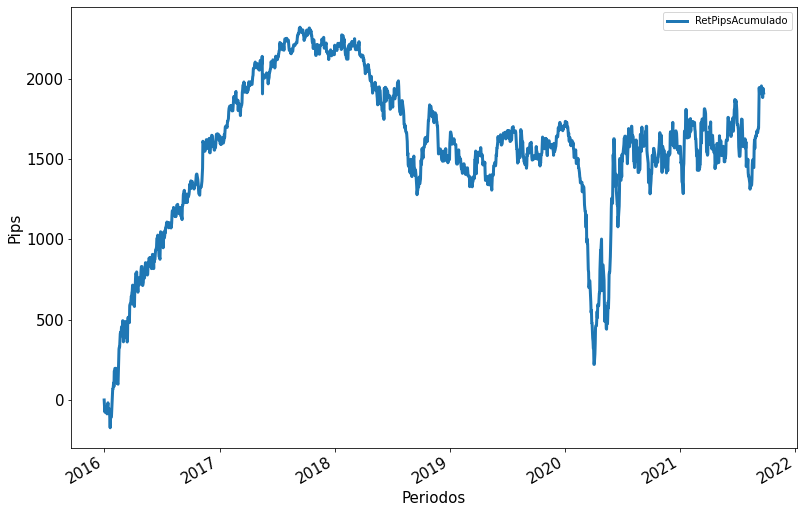

In [254]:
dolTest["RetPipsAcumulado"].plot(figsize = (13,9)
                              ,linewidth = 3
                              ,fontsize = 15)
plt.xlabel('Periodos'
          , fontsize = 15)
plt.ylabel('Pips'
          , fontsize = 15)
plt.legend();

Date
2021-09-21   -2.0
Name: RetPipsAcumulado, dtype: float64


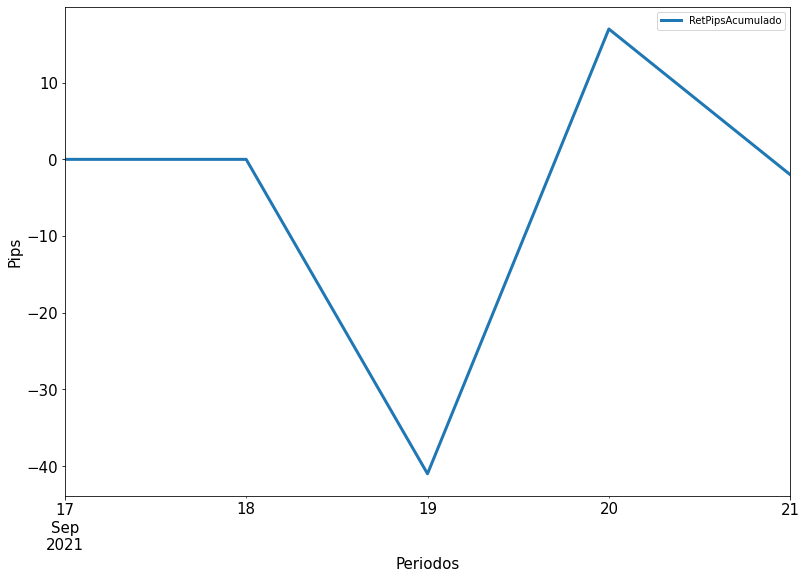

In [255]:
dolTest["RetPipsAcumulado"]=dolTest["RetPipsAcumulado"]-1924
y1 = "2021-09-17"
y2 = "2021-09-21"

X = dolTest.loc[y1  : y2]

print(X.loc[:,"RetPipsAcumulado"].tail(1))

X["RetPipsAcumulado"].plot(figsize = (13,9)
                              ,linewidth = 3
                              ,fontsize = 15)
plt.xlabel('Periodos'
          , fontsize = 15)
plt.ylabel('Pips'
          , fontsize = 15)
plt.legend();